<a href="https://colab.research.google.com/github/prudhviraj2005/collegedemo/blob/main/Email_Spam_Classifier_(Using_Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

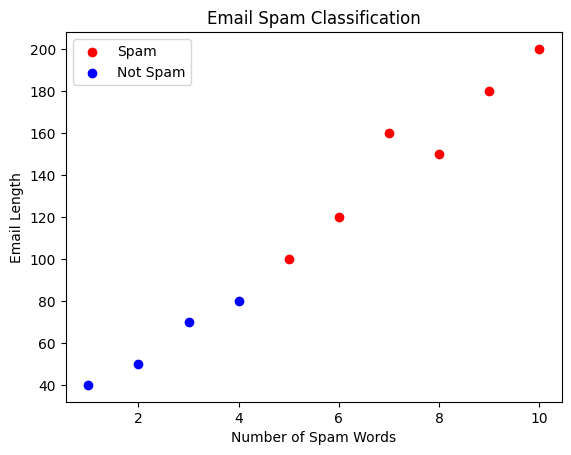

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset (Feature 1: Number of spam words, Feature 2: Email length)
data = {
    "Spam Words": [5, 2, 8, 3, 6, 9, 1, 4, 7, 10],
    "Email Length": [100, 50, 150, 70, 120, 180, 40, 80, 160, 200],
    "Spam": [1, 0, 1, 0, 1, 1, 0, 0, 1, 1]  # 1 = Spam, 0 = Not Spam
}

df = pd.DataFrame(data)

# Scatter plot to visualize spam vs. not spam
plt.scatter(df[df["Spam"] == 1]["Spam Words"], df[df["Spam"] == 1]["Email Length"], color='red', label="Spam")
plt.scatter(df[df["Spam"] == 0]["Spam Words"], df[df["Spam"] == 0]["Email Length"], color='blue', label="Not Spam")
plt.xlabel("Number of Spam Words")
plt.ylabel("Email Length")
plt.legend()
plt.title("Email Spam Classification")
plt.show()


In [2]:
def sigmoid(z):
    """
    Compute the sigmoid function.

    z: Input value (scalar or array)

    Returns: Sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

# Test sigmoid function
print(f"Sigmoid(0) = {sigmoid(0)}")  # Should print 0.5
print(f"Sigmoid(2) = {sigmoid(2)}")  # Closer to 1
print(f"Sigmoid(-2) = {sigmoid(-2)}")  # Closer to 0


Sigmoid(0) = 0.5
Sigmoid(2) = 0.8807970779778823
Sigmoid(-2) = 0.11920292202211755


In [3]:
def compute_cost(X, y, theta):
    """
    Compute the cost function for logistic regression.

    X: Feature matrix (m x n)
    y: Target labels (m x 1)
    theta: Model parameters (n x 1)

    Returns: Cost J(theta)
    """
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost


In [4]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    """
    Perform Gradient Descent to learn theta.

    X: Feature matrix
    y: Target labels
    theta: Model parameters
    learning_rate: Step size
    iterations: Number of iterations

    Returns: Updated theta and cost history
    """
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(X.dot(theta))
        errors = predictions - y
        theta -= (learning_rate / m) * X.T.dot(errors)

        # Compute and store cost
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return theta, cost_history


In [5]:
# Prepare data for training
m = len(df)
X = np.c_[np.ones(m), df["Spam Words"], df["Email Length"]]  # Add intercept term (1s)
y = np.array(df["Spam"]).reshape(m, 1)  # Convert labels to 2D array
theta = np.zeros((X.shape[1], 1))  # Initialize theta to zeros

# Hyperparameters
learning_rate = 0.01
iterations = 1000

# Train model using Gradient Descent
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

print(f"Final theta values: {theta_final}")


Iteration 0: Cost nan
Iteration 100: Cost nan
Iteration 200: Cost nan
Iteration 300: Cost nan
Iteration 400: Cost nan
Iteration 500: Cost nan
Iteration 600: Cost nan
Iteration 700: Cost nan
Iteration 800: Cost nan
Iteration 900: Cost nan
Final theta values: [[-1.81845808]
 [ 1.40611976]
 [ 0.47831185]]


<ipython-input-3-3419cb888bf5>:13: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-3419cb888bf5>:13: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


In [6]:
def predict_email(spam_words, email_length, theta):
    """
    Predict if an email is spam (1) or not (0).

    spam_words: Number of spam-related words
    email_length: Length of email
    theta: Trained parameters

    Returns: Prediction (0 or 1)
    """
    X_test = np.array([1, spam_words, email_length])  # Add intercept
    probability = sigmoid(X_test.dot(theta))
    return 1 if probability >= 0.5 else 0  # Threshold at 0.5

# Test predictions
test_cases = [(3, 90), (8, 160), (2, 50)]  # (Spam Words, Email Length)
for spam_words, email_length in test_cases:
    prediction = predict_email(spam_words, email_length, theta_final)
    print(f"Email with {spam_words} spam words & length {email_length} → {'Spam' if prediction == 1 else 'Not Spam'}")


Email with 3 spam words & length 90 → Spam
Email with 8 spam words & length 160 → Spam
Email with 2 spam words & length 50 → Spam


In [7]:
def compute_accuracy(X, y, theta):
    """
    Compute the accuracy of the model.

    X: Feature matrix
    y: True labels
    theta: Trained parameters

    Returns: Accuracy percentage
    """
    predictions = sigmoid(X.dot(theta)) >= 0.5  # Convert probabilities to 0 or 1
    accuracy = np.mean(predictions == y) * 100  # Percentage of correct predictions
    return accuracy

# Calculate accuracy
accuracy = compute_accuracy(X, y, theta_final)
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 60.00%


In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_model(X, y, theta):
    """
    Compute Precision, Recall, and F1-score for the model.

    X: Feature matrix
    y: True labels
    theta: Trained parameters
    """
    predictions = (sigmoid(X.dot(theta)) >= 0.5).astype(int)  # Convert to binary (0 or 1)

    # Compute confusion matrix
    cm = confusion_matrix(y, predictions)
    print(f"Confusion Matrix:\n{cm}\n")

    # Compute precision, recall, and F1-score
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    f1 = f1_score(y, predictions)

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Evaluate the model
evaluate_model(X, y, theta_final)


Confusion Matrix:
[[0 4]
 [0 6]]

Precision: 0.60
Recall: 1.00
F1-score: 0.75


In [10]:
from sklearn.model_selection import train_test_split


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split  # ✅ Import this
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)  # Convert labels to integers

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize the dataset

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Dataset successfully loaded and split! 🚀")


Dataset successfully loaded and split! 🚀


In [12]:
def gradient_descent_reg(X, y, theta, learning_rate, iterations, lambda_):
    """
    Perform Gradient Descent with L2 Regularization.

    X: Feature matrix
    y: Target labels
    theta: Model parameters
    learning_rate: Step size
    iterations: Number of iterations
    lambda_: Regularization strength

    Returns: Updated theta and cost history
    """
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(X.dot(theta))
        errors = predictions - y

        # Apply L2 Regularization (Don't regularize theta[0] for bias term)
        theta[1:] = theta[1:] - learning_rate * ((X[:, 1:].T.dot(errors) / m) + (lambda_ / m) * theta[1:])
        theta[0] = theta[0] - learning_rate * (X[:, 0].T.dot(errors) / m)  # Bias term update without regularization

        # Compute cost with L2 Regularization
        cost = compute_cost(X, y, theta) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
        cost_history.append(cost)

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return theta, cost_history


In [13]:
# Initialize parameters
theta = np.zeros((X_train.shape[1], 1))  # Initialize theta to zeros

# Hyperparameters
learning_rate = 0.01
iterations = 1000
lambda_ = 0.1  # Regularization strength

# Train model using L2-Regularized Gradient Descent
theta_final, cost_history = gradient_descent_reg(X_train, y_train.reshape(-1, 1), theta, learning_rate, iterations, lambda_)

print(f"Final theta values: {theta_final}")


Iteration 0: Cost -0.244794331180099


<ipython-input-3-3419cb888bf5>:13: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-3419cb888bf5>:13: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration 100: Cost nan
Iteration 200: Cost nan
Iteration 300: Cost nan
Iteration 400: Cost nan


<ipython-input-2-4190ee8ec6c0>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration 500: Cost nan
Iteration 600: Cost nan
Iteration 700: Cost nan
Iteration 800: Cost nan
Iteration 900: Cost nan
Final theta values: [[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 8.21807521e-02]
 [ 3.08857084e-02]
 [-5.48847611e-02]
 [-5.48847611e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 8.76644733e-02]
 [ 2.19854955e-02]
 [ 8.37934688e-04]
 [ 8.30554152e-02]
 [ 1.32904315e-02]
 [ 3.15071424e-01]
 [ 3.48044817e-01]
 [ 2.46925419e-01]
 [ 2.91000960e-01]
 [ 4.00441576e-01]
 [ 3.57177477e-01]
 [ 8.05334505e-02]
 [-2.64100241e-02]
 [ 3.

In [14]:
# Compute accuracy
accuracy = compute_accuracy(X_test, y_test.reshape(-1, 1), theta_final)
print(f"Model Accuracy after Regularization: {accuracy:.2f}%")

# Evaluate precision, recall, and F1-score
evaluate_model(X_test, y_test.reshape(-1, 1), theta_final)


Model Accuracy after Regularization: 10.30%
Confusion Matrix:
[[1267   76    0    0    0    0    0    0    0    0]
 [1425  175    0    0    0    0    0    0    0    0]
 [1258  122    0    0    0    0    0    0    0    0]
 [1065  368    0    0    0    0    0    0    0    0]
 [ 120 1175    0    0    0    0    0    0    0    0]
 [ 715  558    0    0    0    0    0    0    0    0]
 [ 699  697    0    0    0    0    0    0    0    0]
 [  40 1463    0    0    0    0    0    0    0    0]
 [ 385  972    0    0    0    0    0    0    0    0]
 [  39 1381    0    0    0    0    0    0    0    0]]



<ipython-input-2-4190ee8ec6c0>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].